# Exploring Relationships - Task 6.2: Gun Violence in US

#### 1. [Importing Visualization Libraries and Data](#lib)
#### 2. [Exploring Relationships](#relationship)
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
     Box Plot

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Checking matpltlib version
matplotlib.__version__

'3.7.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

<div id = "lib"></div>

In [4]:
# Creating a path
path = r'C:\Users\rpa21\Gun Violence Analysis'

In [ ]:
#Importing Data 
df_guns = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'guns_cleaned.csv'), index_col = False)

In [7]:
# checking the dataframe
df_guns.shape

(239677, 23)

In [10]:
df_guns.head()

,Unnamed: 0,incident_id,date,state,city_or_county,number_killed,number_injured,congressional_district,gun_stolen,gun_type,...,longitude,number_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,sources
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,NaN,NaN,...,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...
1,1,460726,2013-01-01,California,Hawthorne,1,3,43.0,NaN,NaN,...,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...
2,2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...
3,3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,NaN,NaN,...,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...
4,4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...


In [15]:
#dropping a column that is unnecessary
df_guns = df_guns.drop(columns = ['Unnamed: 0'])

In [16]:
df_guns.shape

(239677, 22)

In [18]:
#checking data types
df_guns.dtypes

incident_id                   int64
date                         object
state                        object
city_or_county               object
number_killed                 int64
number_injured                int64
congressional_district      float64
gun_stolen                   object
gun_type                     object
incident_characteristics     object
latitude                    float64
location_description         object
longitude                   float64
number_guns_involved        float64
notes                        object
participant_age              object
participant_age_group        object
participant_gender           object
participant_relationship     object
participant_status           object
participant_type             object
sources                      object
dtype: object

<div id = "relationship"></div>

2. Exploring Relationships

Correlation 

In [38]:
# Choosing only column with numbers to be included
num_col = df_guns.select_dtypes(include=['int', 'float'])

In [40]:
# The 'incident_id' is dropped so it's not included in data

if 'incident_id' in num_col.columns:
    num_col = num_col.drop(columns=['incident_id'])

In [41]:
#Correlation
num_col.corr()

,number_killed,number_injured,congressional_district,latitude,longitude,number_guns_involved
number_killed,1.000000,-0.125425,0.055545,-0.080078,-0.062149,-0.028200
number_injured,-0.125425,1.000000,-0.007636,-0.011379,0.036962,-0.038843
congressional_district,0.055545,-0.007636,1.000000,-0.259488,-0.215606,0.021249
latitude,-0.080078,-0.011379,-0.259488,1.000000,-0.056713,-0.001341
longitude,-0.062149,0.036962,-0.215606,-0.056713,1.000000,-0.016107
number_guns_involved,-0.028200,-0.038843,0.021249,-0.001341,-0.016107,1.000000


Text(0.5, 1.0, 'Correlation Matrix-Gun Violence')

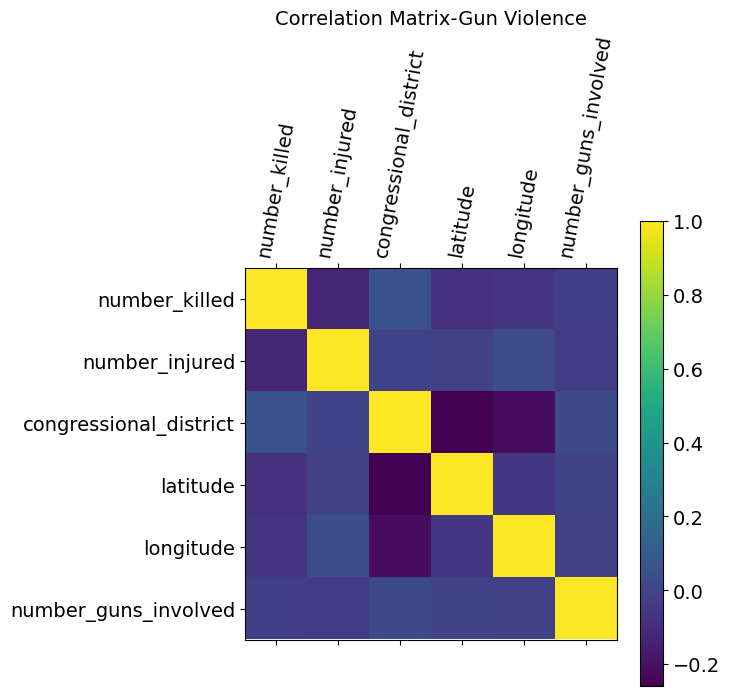

In [42]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(6, 6)) # shows the figure size 
plt.matshow(num_col.corr(), fignum=f.number) # tells the type of plot
plt.xticks(range(num_col.shape[1]), num_col.columns, fontsize=14, rotation= 80) # x axis labels
plt.yticks(range(num_col.shape[1]), num_col.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # color legend (colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix-Gun Violence', fontsize=14) # add title

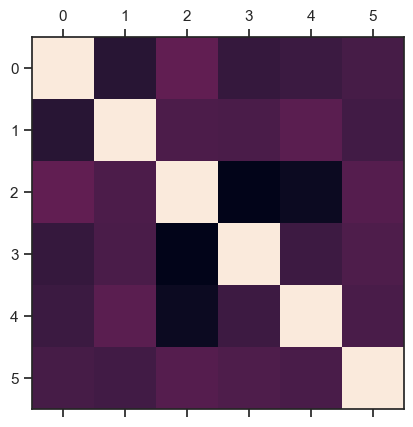

In [127]:
# Save figure
plt.matshow(num_col.corr())
plt.savefig("out.png") 

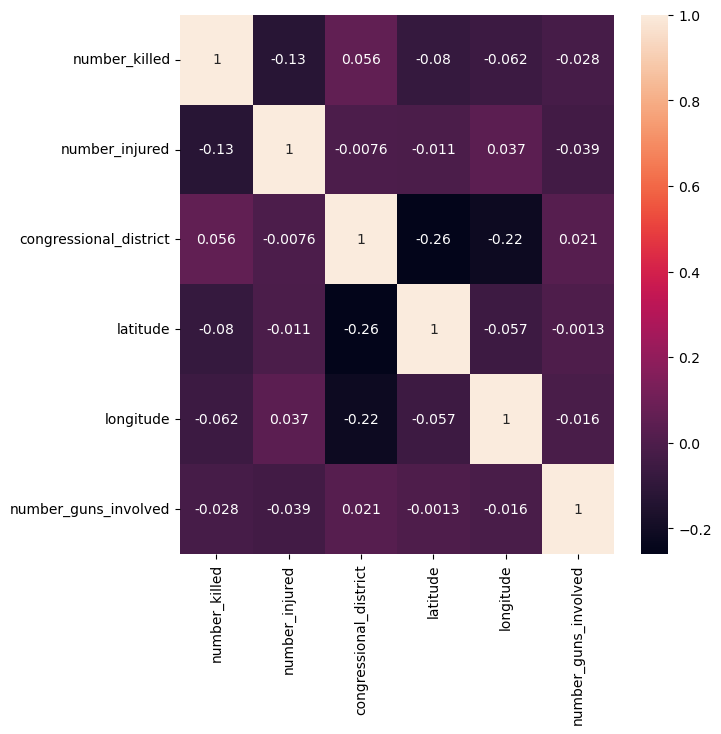

In [48]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(7,7))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(num_col.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

There are not any good correlations in the dataframe variables.  Looking at a few variables, number killed, injured, and number of guns involved, there does not seem to matter how many guns were involved to how many people were killed or injured. 

Scatterplots

C:\Users\rpa21\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


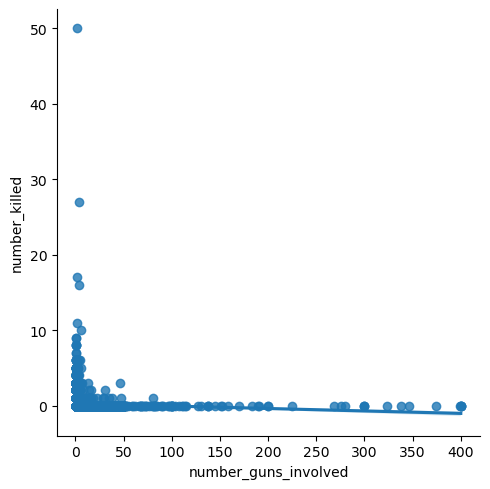

In [50]:
sns.lmplot(x = 'number_guns_involved', y = 'number_killed', data = num_col)

C:\Users\rpa21\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


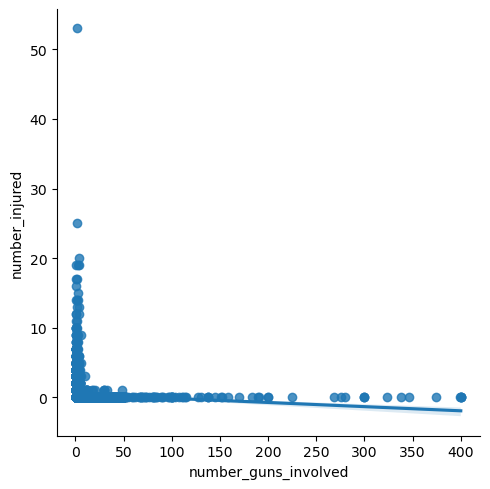

In [51]:
sns.lmplot(x = 'number_guns_involved', y = 'number_injured', data = num_col)

There is a very week relationship represented in both scatterplots.  The outliers represent shootings where many people were killed because they were in an inclosed space and the wepon used was semi-automatic or automatic. 

Pair Plots

In [58]:
# Keep only the variables you want to use in the pair plot

sub_2 = num_col[['number_killed', 'number_injured', 'number_guns_involved', 'congressional_district']]

C:\Users\rpa21\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rpa21\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rpa21\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rpa21\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

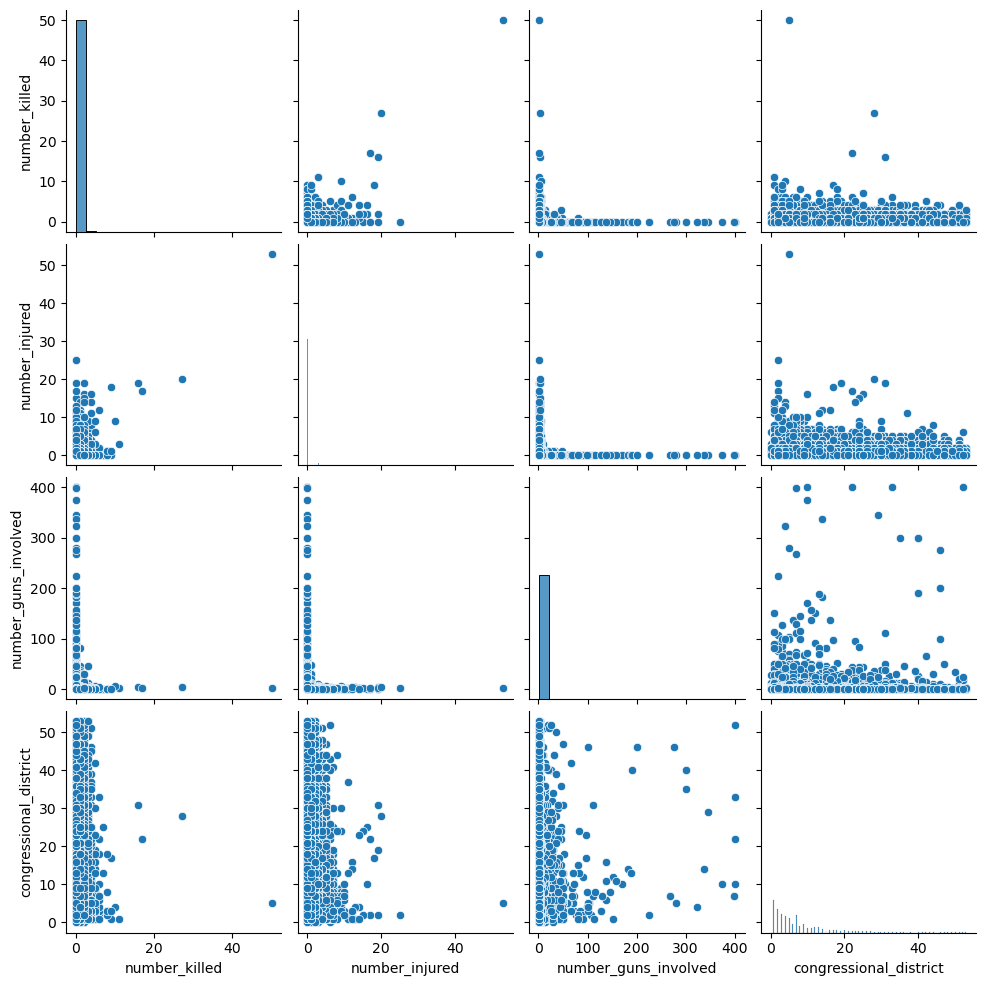

In [59]:
# Create subplot
g = sns.pairplot(sub_2)

There's only a low amount of guns involved in most violence in congressional districts. 
There are few numberof guns involved in most of the violence where people were killed or injured. 

Histogram

C:\Users\rpa21\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='number_killed', ylabel='Count'>

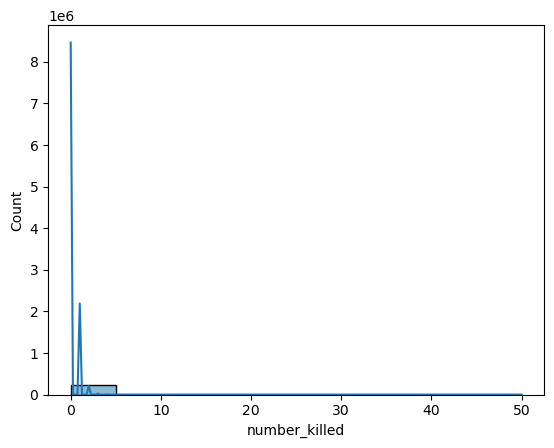

In [80]:
sns.histplot(df_guns['number_killed'], bins = 10, kde = True)

Category Plot

In [109]:
df_guns.shape

(239677, 24)

In [111]:
# Removed Nan in number_guns_used 
df_guns_clean = df_guns[df_guns['number_guns_involved'].isnull() == False]

In [112]:
df_guns_clean.shape

(140226, 24)

In [118]:
df_guns_clean.loc[(df_guns_clean['number_guns_involved'] <= 25),'Gun Category'] = 'Low Number of Guns'

In [119]:
df_guns_clean.loc[(df_guns_clean['number_guns_involved'] > 25) & (df_guns_clean['number_guns_involved'] <= 75), 'Gun Category'] = 'Medium Number of Guns'

In [120]:
df_guns_clean.loc[(df_guns_clean['number_guns_involved'] > 75),'Gun Category'] = 'High Number of Guns'

C:\Users\rpa21\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rpa21\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rpa21\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


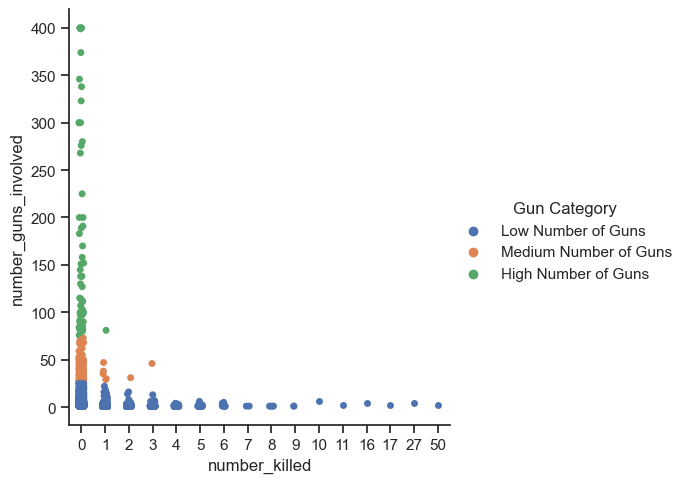

In [121]:
sns.set(style="ticks")
g = sns.catplot(x="number_killed", y="number_guns_involved", hue="Gun Category", data=df_guns_clean)

In [132]:
# Save figure
# fig = g.get_figure()
g.savefig("out.png") 


In [122]:
df_guns_clean.loc[(df_guns_clean['number_killed'] <= 10),'Killed Category'] = 'Low Number Killed'

In [123]:
df_guns_clean.loc[(df_guns_clean['number_killed'] > 10) & (df_guns_clean['number_killed'] <= 25), 'Killed Category'] = 'Medium Number Killed'

In [124]:
df_guns_clean.loc[(df_guns_clean['number_killed'] > 25),'Killed Category'] = 'High Number Killed'

C:\Users\rpa21\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rpa21\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rpa21\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


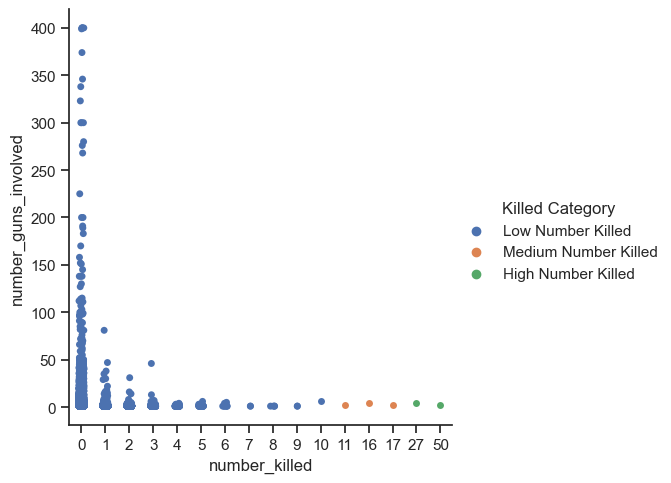

In [133]:
sns.set(style="ticks")
g2 = sns.catplot(x="number_killed", y="number_guns_involved", hue="Killed Category", data=df_guns_clean)

In [134]:
# fig = g.get_figure()
g2.savefig("out.png") 


These continue to prove there is a lack of relationship in the variables.

Bar Chart of the top violent states

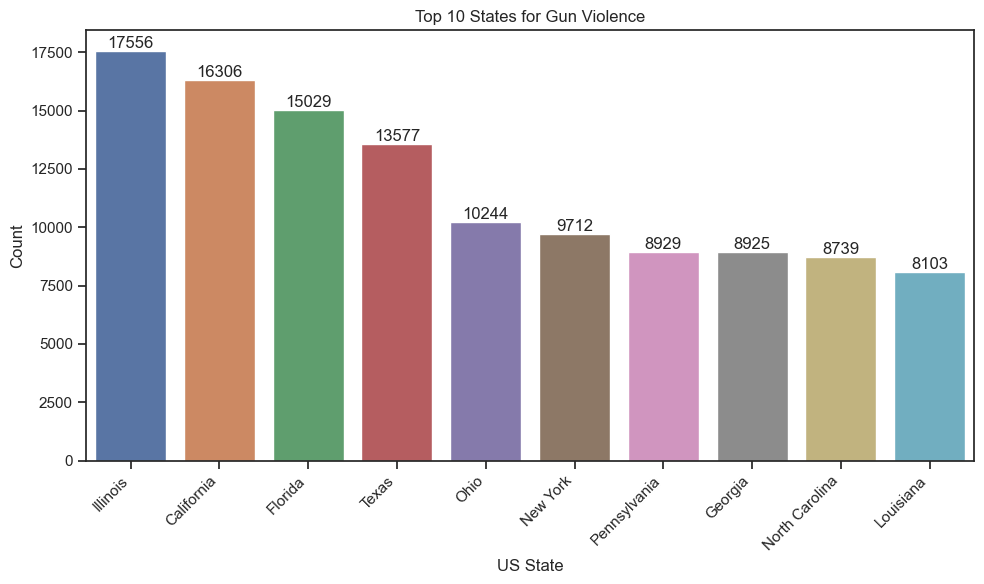

In [129]:
#Get the top 10 states by count
top_countries = df_guns['state'].value_counts().head(10)

# Create a bar plot with log scale
plt.figure(figsize=(10, 6))
bp=sns.barplot(x=top_countries.index, y=top_countries.values)
#plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 
plt.xlabel('US State')
plt.ylabel('Count')
plt.title('Top 10 States for Gun Violence')
bp.bar_label(bp.containers[0])
plt.tight_layout()